![Redes Sociales](../redes_sociales_pythonperu.png)

# **🧪 Proyecto: Análisis de Consumo Energético Residencial en una Ciudad**

Una municipalidad local ha recopilado información sobre el consumo energético residencial mensual en los hogares de distintos distritos durante un año. El objetivo es analizar el comportamiento del consumo, detectar patrones y ayudar a diseñar políticas de eficiencia energética.

Como analista de datos, se te ha encargado procesar y analizar estos datos utilizando NumPy y Pandas.



### **📊 Características del Proyecto**


✅ Objetivos del análisis
- Calcular estadísticas descriptivas del consumo energético.

- Identificar distritos con mayor y menor consumo promedio.

- Detectar variabilidad mensual del consumo por distrito.

- Filtrar hogares con consumos atípicos (muy altos o muy bajos).

- Visualizar patrones de consumo a lo largo del año.

📁 Estructura del Dataset (que se debe crear)

| Columna                            | Tipo       | Descripción                                               |
| ---------------------------------- | ---------- | --------------------------------------------------------- |
| `hogar_id`                         | string/int | Identificador único del hogar                             |
| `distrito`                         | string     | Nombre del distrito donde se ubica el hogar               |
| `habitantes`                       | int        | Número de personas que viven en el hogar                  |
| `consumo_mes_1` a `consumo_mes_12` | float      | Consumo energético mensual en kWh desde enero a diciembre |


🧬 Generación del Dataset de Prueba

In [4]:
import numpy as np
import pandas as pd

np.random.seed(42)

n_hogares = 100
distritos = ['Centro', 'Norte', 'Sur', 'Este', 'Oeste']

data = {
    'hogar_id': np.arange(1, n_hogares + 1),
    'distrito': np.random.choice(distritos, size=n_hogares),
    'habitantes': np.random.randint(1, 6, size=n_hogares),
}

# Crear columnas de consumo mensual con variabilidad aleatoria
for mes in range(1, 13):
    data[f'consumo_mes_{mes}'] = np.random.normal(loc=200, scale=50, size=n_hogares).round(2)

In [5]:
df = pd.DataFrame(data)
df.head()

,hogar_id,distrito,habitantes,consumo_mes_1,consumo_mes_2,consumo_mes_3,consumo_mes_4,consumo_mes_5,consumo_mes_6,consumo_mes_7,consumo_mes_8,consumo_mes_9,consumo_mes_10,consumo_mes_11,consumo_mes_12
0,1,Este,4,197.73,154.33,157.34,216.66,224.83,156.22,208.32,208.77,188.94,286.61,203.19,157.14
1,2,Oeste,1,210.85,177.25,199.29,187.10,190.29,210.23,151.20,269.43,209.49,253.75,206.03,147.09
2,3,Sur,4,225.62,179.36,210.10,26.09,189.69,169.87,199.01,261.51,259.32,318.43,180.28,234.63
3,4,Oeste,2,227.17,229.78,159.76,186.59,86.10,265.09,216.68,241.80,188.18,178.80,178.64,222.88
4,5,Oeste,1,201.40,100.42,127.97,174.10,239.87,168.63,196.79,67.64,140.73,182.33,163.96,251.44


### **📈 Actividades a realizar con NumPy y Pandas**
- Estadísticas básicas: Promedio, mediana, máximo, mínimo, desviación estándar del consumo por hogar y por distrito.



In [ ]:
# Crear una lista de columnas de consumo
columnas_consumo = [f'consumo_mes_{i}' for i in range(1,13)]
print(columnas_consumo)

['consumo_mes_1', 'consumo_mes_2', 'consumo_mes_3', 'consumo_mes_4', 'consumo_mes_5', 'consumo_mes_6', 'consumo_mes_7', 'consumo_mes_8', 'consumo_mes_9', 'consumo_mes_10', 'consumo_mes_11', 'consumo_mes_12']


In [8]:
df['promedio'] = df[columnas_consumo].mean(axis=1)
df['mediana'] = df[columnas_consumo].median(axis=1)
df['maximo'] = df[columnas_consumo].max(axis=1)
df['minimo'] = df[columnas_consumo].min(axis=1)
df['desviacion_std'] = df[columnas_consumo].std(axis=1)

df[['hogar_id', 'promedio', 'mediana', 'maximo', 'minimo', 'desviacion_std']].head()

,hogar_id,promedio,mediana,maximo,minimo,desviacion_std
0,1,196.673333,200.460,286.61,154.33,38.382828
1,2,201.000000,202.660,269.43,147.09,35.683014
2,3,204.492500,204.555,318.43,26.09,70.786566
3,4,198.455833,202.430,265.09,86.10,46.903970
4,5,167.940000,171.365,251.44,67.64,53.356800


- Agregar una columna consumo_total y consumo_promedio_mensual.



In [10]:
df['consumo_total'] = df[columnas_consumo].sum(axis=1)
df['consumo_promedio_mensual'] = df[columnas_consumo].mean(axis=1)

df[['hogar_id', 'consumo_total', 'consumo_promedio_mensual']].head()

,hogar_id,consumo_total,consumo_promedio_mensual
0,1,2360.08,196.673333
1,2,2412.00,201.000000
2,3,2453.91,204.492500
3,4,2381.47,198.455833
4,5,2015.28,167.940000


- Filtrar hogares con consumo promedio mayor a 200 kWh.



In [17]:
filtro = df['consumo_promedio_mensual'] > 200
# Aplica el filtro
alto_consumo = df[filtro]
alto_consumo.head()

,hogar_id,distrito,habitantes,consumo_mes_1,consumo_mes_2,consumo_mes_3,consumo_mes_4,consumo_mes_5,consumo_mes_6,consumo_mes_7,...,consumo_mes_10,consumo_mes_11,consumo_mes_12,promedio,mediana,maximo,minimo,desviacion_std,consumo_total,consumo_promedio_mensual
1,2,Oeste,1,210.85,177.25,199.29,187.10,190.29,210.23,151.20,...,253.75,206.03,147.09,201.000000,202.660,269.43,147.09,35.683014,2412.00,201.000000
2,3,Sur,4,225.62,179.36,210.10,26.09,189.69,169.87,199.01,...,318.43,180.28,234.63,204.492500,204.555,318.43,26.09,70.786566,2453.91,204.492500
6,7,Sur,3,239.48,172.94,290.68,171.84,289.76,220.94,285.07,...,228.56,240.26,171.61,228.229167,233.540,290.68,171.61,45.047177,2738.75,228.229167
7,8,Sur,4,221.57,238.84,220.23,326.96,196.27,180.54,204.38,...,218.76,139.05,221.61,220.986667,220.900,326.96,139.05,44.503763,2651.84,220.986667
9,10,Oeste,3,165.88,225.93,204.14,180.50,241.59,145.03,281.04,...,195.91,209.83,187.48,200.425000,197.460,281.04,145.03,36.677584,2405.10,200.425000


- Detectar hogares con consumo mensual fuera de 2 desviaciones estándar (outliers).



In [ ]:
promedio = df[columnas_consumo].mean()
desv_std = df[columnas_consumo].std()
promedio # Series

consumo_mes_1     199.6190
consumo_mes_2     204.5920
consumo_mes_3     193.8988
consumo_mes_4     206.3335
consumo_mes_5     210.1632
consumo_mes_6     199.6865
consumo_mes_7     200.5644
consumo_mes_8     202.5482
consumo_mes_9     206.6162
consumo_mes_10    201.2980
consumo_mes_11    206.2719
consumo_mes_12    189.1746
dtype: float64

In [ ]:
desv_std # Series

consumo_mes_1     50.004884
consumo_mes_2     49.785061
consumo_mes_3     48.068973
consumo_mes_4     57.565498
consumo_mes_5     59.896278
consumo_mes_6     51.937626
consumo_mes_7     52.593373
consumo_mes_8     43.066851
consumo_mes_9     48.731402
consumo_mes_10    61.338436
consumo_mes_11    50.595678
consumo_mes_12    54.295919
dtype: float64

In [24]:
def es_outlier(fila):
    # Recorrer cada mes
    for mes in columnas_consumo:
        # obtenemos el consumo de hogar en cada mes
        valor = fila[mes]
    
        # Calcular los limites
        lim_superior = promedio[mes] + 2 * desv_std[mes]
        lim_inferior = promedio[mes] - 2 * desv_std[mes]
        
        # Si el consumo se sale del rango permitido, es un outlier.
        if valor > lim_superior or valor < lim_inferior:
            return True # Es outlier
    
    return False # No se detectó valores atípicos

In [25]:
df['outlier'] = df.apply(es_outlier, axis=1)

In [26]:
df.head()

,hogar_id,distrito,habitantes,consumo_mes_1,consumo_mes_2,consumo_mes_3,consumo_mes_4,consumo_mes_5,consumo_mes_6,consumo_mes_7,...,consumo_mes_11,consumo_mes_12,promedio,mediana,maximo,minimo,desviacion_std,consumo_total,consumo_promedio_mensual,outlier
0,1,Este,4,197.73,154.33,157.34,216.66,224.83,156.22,208.32,...,203.19,157.14,196.673333,200.460,286.61,154.33,38.382828,2360.08,196.673333,False
1,2,Oeste,1,210.85,177.25,199.29,187.10,190.29,210.23,151.20,...,206.03,147.09,201.000000,202.660,269.43,147.09,35.683014,2412.00,201.000000,False
2,3,Sur,4,225.62,179.36,210.10,26.09,189.69,169.87,199.01,...,180.28,234.63,204.492500,204.555,318.43,26.09,70.786566,2453.91,204.492500,True
3,4,Oeste,2,227.17,229.78,159.76,186.59,86.10,265.09,216.68,...,178.64,222.88,198.455833,202.430,265.09,86.10,46.903970,2381.47,198.455833,True
4,5,Oeste,1,201.40,100.42,127.97,174.10,239.87,168.63,196.79,...,163.96,251.44,167.940000,171.365,251.44,67.64,53.356800,2015.28,167.940000,True


In [29]:
filtro = df['outlier'] == True
df[filtro][['hogar_id', 'distrito', 'outlier']].head()

,hogar_id,distrito,outlier
2,3,Sur,True
3,4,Oeste,True
4,5,Oeste,True
6,7,Sur,True
7,8,Sur,True


- Comparar consumo total promedio entre distritos.


In [35]:
promedio_total_distrito = df.groupby('distrito')['consumo_total'].mean().reset_index().sort_values(by='consumo_total', ascending=False).round(2)
promedio_total_distrito

,distrito,consumo_total
4,Sur,2534.69
1,Este,2408.52
2,Norte,2398.77
0,Centro,2398.45
3,Oeste,2387.03



- Usar NumPy para aplicar operaciones vectorizadas (ej. normalización, escalado).


In [36]:
minimo = df['consumo_total'].min()
maximo = df['consumo_total'].max()
df['consumo_total_normalizado'] = (df['consumo_total']-minimo) / (maximo - minimo)

In [38]:
df[['hogar_id', 'consumo_total', 'consumo_total_normalizado']].head(10)

,hogar_id,consumo_total,consumo_total_normalizado
0,1,2360.08,0.415307
1,2,2412.00,0.477843
2,3,2453.91,0.528323
3,4,2381.47,0.441071
4,5,2015.28,0.000000
5,6,2302.80,0.346314
6,7,2738.75,0.871409
7,8,2651.84,0.766727
8,9,2294.87,0.336762
9,10,2405.10,0.469533



- Visualización opcional: Línea de consumo promedio mensual por distrito.

In [42]:
consumo_promedio_mensual_distrito = df.groupby('distrito')[columnas_consumo].mean().T
consumo_promedio_mensual_distrito

distrito,Centro,Este,Norte,Oeste,Sur
consumo_mes_1,186.175556,201.425385,197.437619,203.818947,209.683125
consumo_mes_2,206.987778,203.928077,202.865238,200.953684,209.562500
consumo_mes_3,180.917778,182.162308,180.518571,207.203684,229.336250
consumo_mes_4,192.024444,214.983077,203.648095,204.117895,214.531250
consumo_mes_5,201.101667,207.637692,223.350952,193.592632,226.830000
consumo_mes_6,217.326667,202.190385,184.605714,186.740000,210.940000
consumo_mes_7,202.409444,197.608462,209.625714,199.942105,192.138125
consumo_mes_8,199.387778,194.922692,198.531429,205.492105,220.271250
consumo_mes_9,205.335000,192.692308,211.517619,206.476842,224.416250
consumo_mes_10,196.435556,200.541538,197.337619,197.922105,217.204375


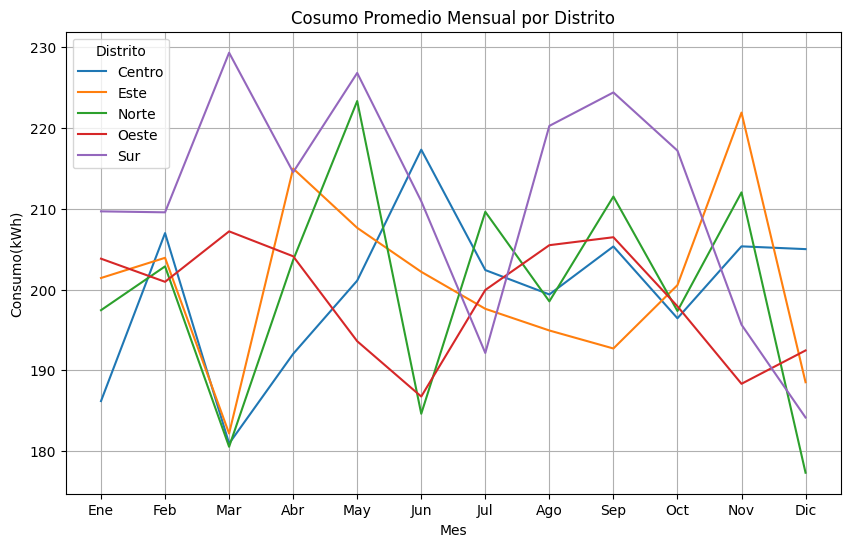

In [44]:
import matplotlib.pyplot as plt

consumo_promedio_mensual_distrito.plot(figsize=(10,6))
plt.title('Cosumo Promedio Mensual por Distrito')
plt.xlabel('Mes')
plt.ylabel('Consumo(kWh)')
plt.legend(title = 'Distrito')
plt.grid(True) # Rejillas
plt.xticks(ticks=np.arange(12), labels=[
    'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
    'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'
])
plt.show()